# Asset Pricing Assignment: Question 3

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
from scipy.stats import f

3a. Theory-based question.

3b. Check whether there is any abnormal return variation across portfolios of stocks with different investment growth rates. Estimate the CAPM for each of the 10 portfolios and plot the CAPM $\alpha$'s against investment deciles.

In [2]:
# read file Portfolios_Formed_on_INV_Cleaned_MktR.CSV
dfinv = pd.read_csv('Portfolios_Formed_on_INV_Cleaned_MktR.csv', nrows=734, skiprows=1, sep=',')

# rename column 0 as 'Date'
dfinv.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# read Date as integer
dfinv['Date'] = dfinv['Date'].astype(int)

dfinv.head()

,Date,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec-02,Dec-03,Dec-04,Dec-05,Dec-06,Dec-07,Dec-08,Dec-09,Hi 10,Mkt-RF
0,196307,-1.14,0.32,0.43,-1.61,-0.11,0.60,0.27,0.55,-2.34,-0.69,-0.12,-0.10,1.04,0.25,0.25,0.30,0.49,0.73,-0.39
1,196308,5.84,5.02,5.54,6.07,5.35,5.45,4.53,6.47,5.40,6.90,5.34,5.36,5.64,5.30,4.54,4.51,6.05,7.72,5.07
2,196309,-1.43,-1.09,-1.08,-0.62,-1.39,-2.44,-0.48,-1.33,-0.83,-0.37,-3.21,-0.32,-2.76,-2.18,-0.26,-0.80,-1.15,-1.85,-1.57
3,196310,2.28,1.70,5.98,2.66,0.93,1.32,3.22,7.39,2.91,2.37,1.41,0.66,0.95,1.61,2.41,4.41,8.41,4.38,2.53
4,196311,0.39,0.02,-2.04,0.74,-1.12,-1.42,0.88,-3.47,1.85,-0.62,-0.40,-1.53,-1.80,-1.11,1.77,-0.40,-4.39,-0.64,-0.85


In [3]:
# estimate the CAPM for 10 portfolios
CAPM_results = {}

# assume homoskedasticity
for model in dfinv.columns[9:19]:
    x = dfinv[['Mkt-RF']]
    x = sm.add_constant(x)
    CAPM_results[model] = sm.OLS(dfinv[model], x).fit()

CAPM_results

{'Lo 10': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e6ef5f0>,
 'Dec-02': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a12fd3890>,
 'Dec-03': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e9a66f0>,
 'Dec-04': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a482eee70>,
 'Dec-05': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e749790>,
 'Dec-06': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e749130>,
 'Dec-07': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e7494c0>,
 'Dec-08': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e749fd0>,
 'Dec-09': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e74a960>,
 'Hi 10': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e74a780>}

In [4]:
# extract alphas from regression results
alpha_list = []

for key in CAPM_results:
    a = CAPM_results[key]
    alpha_list.append({"Portfolio": key, "Alpha": round(a.params['const'], 2)})

alphas = pd.DataFrame(alpha_list)
display(alphas)

,Portfolio,Alpha
0,Lo 10,0.54
1,Dec-02,0.59
2,Dec-03,0.57
3,Dec-04,0.47
4,Dec-05,0.48
5,Dec-06,0.42
6,Dec-07,0.44
7,Dec-08,0.42
8,Dec-09,0.35
9,Hi 10,0.07


In [5]:
# plot CAPM alphas against investment deciles
deciles_list = []
x = range(10, 101, 10)
for n in x:
    deciles_list.append(n)

deciles = pd.DataFrame(deciles_list)
alpha_plot = pd.concat([deciles, alphas],axis=1,ignore_index=True)
alpha_plot = alpha_plot.rename(columns={0: "Decile", 1: "Portfolio", 2: "Alpha"})
alpha_plot.drop(['Portfolio'],axis=1,inplace=True)

alpha_plot

,Decile,Alpha
0,10,0.54
1,20,0.59
2,30,0.57
3,40,0.47
4,50,0.48
5,60,0.42
6,70,0.44
7,80,0.42
8,90,0.35
9,100,0.07


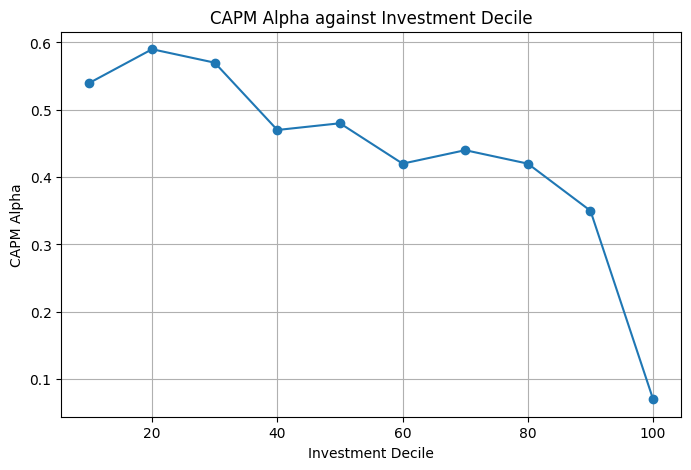

In [6]:
# plot CAPM alphas against investment deciles
plt.figure(figsize=(8, 5))
plt.plot(alpha_plot['Decile'], alpha_plot['Alpha'], marker='o', linestyle='-')

plt.xlabel('Investment Decile')
plt.ylabel('CAPM Alpha')
plt.title('CAPM Alpha against Investment Decile')
plt.grid(True)
plt.show()

3c. Theory-based question.

3d. Consider the classic Fama-French model and its extension that includes the investment growth factor. Estimate the two models given by eq. (1) and (2) on the 25 portfolios used in Question (1). For each model, report in a table the adjusted R2, α and its corresponding t-statistics. Then, again for each model, report the GRS test statistics and the corresponding p-value. Compare your results for the two models.

In [7]:
# create INV (investment growth factor)
dfinv["INV"] = (dfinv["Hi 30"] - dfinv["Lo 30"])

dfinv.head()

,Date,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,...,Dec-03,Dec-04,Dec-05,Dec-06,Dec-07,Dec-08,Dec-09,Hi 10,Mkt-RF,INV
0,196307,-1.14,0.32,0.43,-1.61,-0.11,0.60,0.27,0.55,-2.34,...,-0.12,-0.10,1.04,0.25,0.25,0.30,0.49,0.73,-0.39,1.57
1,196308,5.84,5.02,5.54,6.07,5.35,5.45,4.53,6.47,5.40,...,5.34,5.36,5.64,5.30,4.54,4.51,6.05,7.72,5.07,-0.30
2,196309,-1.43,-1.09,-1.08,-0.62,-1.39,-2.44,-0.48,-1.33,-0.83,...,-3.21,-0.32,-2.76,-2.18,-0.26,-0.80,-1.15,-1.85,-1.57,0.35
3,196310,2.28,1.70,5.98,2.66,0.93,1.32,3.22,7.39,2.91,...,1.41,0.66,0.95,1.61,2.41,4.41,8.41,4.38,2.53,3.70
4,196311,0.39,0.02,-2.04,0.74,-1.12,-1.42,0.88,-3.47,1.85,...,-0.40,-1.53,-1.80,-1.11,1.77,-0.40,-4.39,-0.64,-0.85,-2.43


In [10]:
# read file F-F_Research_Data_Factors.CSV
dfff = pd.read_csv('F-F_Research_Data_Factors.CSV', nrows=733, sep=',')

# rename column 0 as 'Date'
dfff.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# read Date as integer
dfff['Date'] = dfff['Date'].astype(int)

# remove duplicate Mkt-RF column
dfff.drop(["Mkt-RF"], axis=1, inplace=True)

# add INV column
dfff = pd.merge(dfff, dfinv, on="Date")
dfff = dfff[["Date","Mkt-RF", "SMB", "HML", "INV"]]

dfff.head()

,Date,Mkt-RF,SMB,HML,INV
0,196307,-0.39,-0.45,-0.97,1.57
1,196308,5.07,-0.98,1.80,-0.30
2,196309,-1.57,-0.33,0.13,0.35
3,196310,2.53,-0.58,-0.10,3.70
4,196311,-0.85,-1.17,1.75,-2.43


In [11]:
# read file 25_Portfolios_Cleaned.csv
df25p = pd.read_csv('25_Portfolios_Cleaned.csv', nrows=733, sep=',')

# rename column 0 as 'Date'
df25p.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# read Date as integer
df25p['Date'] = df25p['Date'].astype(int)

df25p.head()

,Date,ME1 BM1,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,ME5 BM1,ME5 BM2,ME5 BM3,ME5 BM4,ME5 BM5
0,196307,1.1307,-0.3091,0.7079,0.1062,-1.3211,-1.8071,0.1899,-1.0105,-1.9644,...,-0.9806,-1.6781,-1.9184,-1.5741,-1.8567,0.1547,0.4833,1.2286,-0.5862,-1.1026
1,196308,4.2370,1.3834,1.4977,2.3755,4.7567,5.5665,4.5191,4.4424,4.4188,...,5.4259,4.7306,6.2332,7.6782,5.3469,5.7691,4.2550,4.5936,8.2831,6.3824
2,196309,-2.8878,0.6263,-1.0204,-1.6000,-0.4320,-4.0502,-1.5034,-0.8798,-1.1812,...,-2.7974,-2.0801,-1.7800,-3.9639,-1.9943,-1.3595,-0.8054,-0.8135,-0.2145,-3.4963
3,196310,1.2885,-0.7071,1.3132,0.0855,2.3988,1.1916,4.2342,2.3524,2.2012,...,-0.3902,0.6829,2.6229,4.8492,0.6113,5.3339,1.7427,-0.2469,2.3915,0.4857
4,196311,-3.3751,-3.7534,-1.8055,-1.0487,-1.0538,-4.2561,-1.7534,-0.7809,-0.1002,...,-0.8798,-0.6434,-0.7933,1.3610,3.5388,-1.2556,1.0072,-1.7425,-2.0838,1.3455


In [12]:
# regression for classic 3-factor Fama-French model
FF_classic = {}

# assume homoskedasticity
for portfolio in df25p.columns[1:]:
    x = dfff[['Mkt-RF','SMB','HML']]
    x = sm.add_constant(x)
    FF_classic[portfolio] = sm.OLS(df25p[portfolio], x).fit()

FF_classic

{'ME1 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0c2df5f0>,
 'ME1 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0c28ff50>,
 'ME1 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0c28c740>,
 'ME1 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0c28f2c0>,
 'ME1 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e520ec0>,
 'ME2 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e521820>,
 'ME2 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e521730>,
 'ME2 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e53f9e0>,
 'ME2 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e53ff50>,
 'ME2 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e506b40>,
 'ME3 BM1': <statsmodels.regression.linear_model.RegressionR

In [13]:
# regression for Fama-French model with INV
FF_extended = {}

# assume homoskedasticity
for portfolio in df25p.columns[1:]:
    x = dfff[['Mkt-RF','SMB','HML','INV']]
    x = sm.add_constant(x)
    FF_extended[portfolio] = sm.OLS(df25p[portfolio], x).fit()

FF_extended

{'ME1 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0c2dea80>,
 'ME1 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0c2ddac0>,
 'ME1 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e4c9610>,
 'ME1 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e4cb8f0>,
 'ME1 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e4cb6b0>,
 'ME2 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e4cb3e0>,
 'ME2 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e4cbe60>,
 'ME2 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a10f5d610>,
 'ME2 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a0e699010>,
 'ME2 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x758a1d73caa0>,
 'ME3 BM1': <statsmodels.regression.linear_model.RegressionR

In [14]:
# report adjusted R-squared, alphas, t-statistics for classic Fama-French model
ffclassic_r2_dict = {}
ffclassic_alpha_dict = {}
ffclassict_const_dict = {}
ffclassict_mktrf_dict = {}
ffclassict_smb_dict = {}
ffclassict_hml_dict = {}

for key in FF_classic:
    res = FF_classic[key]
    ffclassic_r2_dict[key] = round(res.rsquared_adj,2)
    ffclassic_alpha_dict[key] = round(res.params['const'], 2)
    ffclassict_const_dict[key] = round(res.tvalues['const'], 2)
    ffclassict_mktrf_dict[key] = round(res.tvalues['Mkt-RF'], 2)
    ffclassict_smb_dict[key] = round(res.tvalues['SMB'], 2)
    ffclassict_hml_dict[key] = round(res.tvalues['HML'], 2)

ffclassic = pd.DataFrame({"Adjusted R-squared": ffclassic_r2_dict, "Alpha": ffclassic_alpha_dict, "t-statistic (Alpha)": ffclassic_alpha_dict, "t-statistic (Mkt-RF)": ffclassict_mktrf_dict, "t-statistic (SMB)": ffclassict_smb_dict, "t-statistic (HML)": ffclassict_hml_dict})
ffclassic

,Adjusted R-squared,Alpha,t-statistic (Alpha),t-statistic (Mkt-RF),t-statistic (SMB),t-statistic (HML)
ME1 BM1,0.90,-0.16,-0.16,50.38,44.49,-8.36
ME1 BM2,0.92,0.35,0.35,56.96,53.97,0.65
ME1 BM3,0.95,0.33,0.33,74.51,60.33,16.10
ME1 BM4,0.95,0.50,0.50,76.10,63.71,28.48
ME1 BM5,0.91,0.54,0.54,55.90,45.06,28.61
ME2 BM1,0.94,0.15,0.15,73.55,45.80,-14.98
ME2 BM2,0.94,0.37,0.37,80.26,49.83,6.35
ME2 BM3,0.93,0.43,0.43,74.26,39.52,19.60
ME2 BM4,0.94,0.42,0.42,83.66,43.78,34.34
ME2 BM5,0.95,0.36,0.36,89.45,50.60,46.08


In [15]:
# report adjusted R-squared, alphas, t-statistics for extended Fama-French model with INV regressor
ffextended_r2_dict = {}
ffextended_alpha_dict = {}
ffextendedt_const_dict = {}
ffextendedt_mktrf_dict = {}
ffextendedt_smb_dict = {}
ffextendedt_hml_dict = {}
ffextendedt_inv_dict = {}

for key in FF_extended:
    res = FF_extended[key]
    ffextended_r2_dict[key] = round(res.rsquared_adj,2)
    ffextended_alpha_dict[key] = round(res.params['const'], 2)
    ffextendedt_const_dict[key] = round(res.tvalues['const'], 2)
    ffextendedt_mktrf_dict[key] = round(res.tvalues['Mkt-RF'], 2)
    ffextendedt_smb_dict[key] = round(res.tvalues['SMB'], 2)
    ffextendedt_hml_dict[key] = round(res.tvalues['HML'], 2)
    ffextendedt_inv_dict[key] = round(res.tvalues['INV'], 2)

ffextended = pd.DataFrame({"Adjusted R-squared": ffextended_r2_dict, "Alpha": ffextended_alpha_dict, "t-statistic (Alpha)": ffextended_alpha_dict, "t-statistic (Mkt-RF)": ffextendedt_mktrf_dict, "t-statistic (SMB)": ffextendedt_smb_dict, "t-statistic (HML)": ffextendedt_hml_dict, "t-statistic (INV)": ffextendedt_inv_dict})
ffextended

,Adjusted R-squared,Alpha,t-statistic (Alpha),t-statistic (Mkt-RF),t-statistic (SMB),t-statistic (HML),t-statistic (INV)
ME1 BM1,0.90,-0.15,-0.15,48.27,44.44,-5.77,1.21
ME1 BM2,0.92,0.35,0.35,54.83,53.90,0.64,0.21
ME1 BM3,0.95,0.33,0.33,71.76,60.25,12.63,0.13
ME1 BM4,0.95,0.50,0.50,73.13,63.63,22.77,0.89
ME1 BM5,0.91,0.53,0.53,54.18,45.07,21.68,-1.03
ME2 BM1,0.94,0.15,0.15,71.25,45.83,-12.43,-1.18
ME2 BM2,0.94,0.36,0.36,78.67,50.20,3.04,-3.10
ME2 BM3,0.93,0.42,0.42,72.12,39.60,14.29,-1.64
ME2 BM4,0.94,0.42,0.42,81.18,43.86,25.82,-1.59
ME2 BM5,0.95,0.36,0.36,86.19,50.54,35.92,0.00


In [16]:
# GRS test for both models 

# Fama-French classic model

# convert alphas into DataFrame
alphahat_classic = pd.DataFrame([ffclassic_alpha_dict])

# create var-cov matrix for residuals and invert (25x25)
ffclassic_resid =np.zeros((df25p.shape[0],25))
i=0
for key in FF_classic:
    res = FF_classic[key]
    ffclassic_resid[:,i] = res.resid
    i = i+1

sigmahat_classic = np.cov(ffclassic_resid, rowvar=False, bias=True)
sigmahat_classic_inv = pd.DataFrame(np.linalg.inv(sigmahat_classic))

# create omega hat var-cov matrix for factors and invert (3x3)
omegahat_classic_numpy = dfff[["Mkt-RF", "SMB", "HML"]].to_numpy()
omegahat_classic = np.cov(omegahat_classic_numpy, rowvar=False, bias=True)
omegahat_classic_inv = pd.DataFrame(np.linalg.inv(omegahat_classic))

# create ET(f) column vector
mean_mktrf = dfff["Mkt-RF"].mean()
mean_smb = dfff["SMB"].mean()
mean_hml = dfff["HML"].mean()

etf_classic = pd.DataFrame([mean_mktrf,mean_smb,mean_hml])

# Fama-French extended model

# convert alphas into DataFrame
alphahat_extended = pd.DataFrame([ffextended_alpha_dict])

# create var-cov matrix for residuals and invert (25x25)
ffextended_resid =np.zeros((df25p.shape[0],25))
i=0
for key in FF_extended:
    res = FF_extended[key]
    ffextended_resid[:,i] = res.resid
    i = i+1

sigmahat_extended = np.cov(ffextended_resid, rowvar=False, bias=True)
sigmahat_extended_inv = pd.DataFrame(np.linalg.inv(sigmahat_extended))

# create omega hat variance matrix and invert (4x4)
omegahat_extended_numpy = dfff[["Mkt-RF", "SMB", "HML","INV"]].to_numpy()
omegahat_extended = np.cov(omegahat_extended_numpy, rowvar=False, bias=True)
omegahat_extended_inv = pd.DataFrame(np.linalg.inv(omegahat_extended))

# create ET(f) column vector
mean_mktrf = dfff["Mkt-RF"].mean()
mean_smb = dfff["SMB"].mean()
mean_hml = dfff["HML"].mean()
mean_inv = dfff["INV"].mean()

etf_extended = pd.DataFrame([mean_mktrf,mean_smb,mean_hml,mean_inv])


# define argument for GRS test stat
# N: number of portfolios, K: number of regressors, T: number of periods
# .values strips index to avoid matrices not aligned
def grs_test(N, K, T, alphahat, sigmahatinv, etf, omegahatinv):
    grs_stat = ((T-N-K)/N) * (alphahat.values @ sigmahatinv.values @ alphahat.T.values) / (1 + etf.T @ omegahatinv @ etf)
    grs_p_value = 1 - f.cdf(grs_stat, N, T-N-K)
    print(round(grs_stat,2))
    print(round(grs_p_value.item(),25))
    

# Fama-French classic model GRS test
print("F-F Classic Model:")
grs_test(25, 3, df25p.shape[0], alphahat_classic, sigmahat_classic_inv, etf_classic, omegahat_classic_inv)

# Fama-French extended model GRS test
print("F-F Extended Model:")
grs_test(25, 4, df25p.shape[0], alphahat_extended, sigmahat_extended_inv, etf_extended, omegahat_extended_inv)

F-F Classic Model:
       0
0  23.19
1.110223025e-16
F-F Extended Model:
       0
0  23.39
1.110223025e-16


In [17]:
# compare mean, variance of 4 F-F model factors

for factor in dfff:
    print(str(factor))
    print(dfff[str(factor)].mean())
    print(round(dfff[str(factor)].var(),2))



Date
199356.5
3106455.71
Mkt-RF
0.5785655737704918
20.16
SMB
0.16154371584699456
9.29
HML
0.2798770491803279
8.97
INV
-0.17904371584699455
6.71
